<a href="https://colab.research.google.com/github/giauhuynh2002/HuynhPhatGiau-20104026/blob/main/Nhan_dien_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Mon an/Train',target_size=(128,128), batch_size=32, class_mode='categorical')

Found 540 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu test
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Mon an/Test',target_size=(128,128), batch_size=32, class_mode='categorical')



Found 90 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh tieu': 4,
 'Banh xeo': 5,
 'Bun dau': 6,
 'Ca kho': 7,
 'Com tam': 8,
 'Pho': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
test_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh tieu': 4,
 'Banh xeo': 5,
 'Bun dau': 6,
 'Ca kho': 7,
 'Com tam': 8,
 'Pho': 9}

In [ ]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(540, 128, 128, 3)
(540, 10)


In [ ]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(90, 128, 128, 3)
(90, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
17/17 - 19s - loss: 2.3991 - accuracy: 0.1056 - 19s/epoch - 1s/step
Epoch 2/50
17/17 - 17s - loss: 2.2267 - accuracy: 0.1185 - 17s/epoch - 1s/step
Epoch 3/50
17/17 - 20s - loss: 2.1873 - accuracy: 0.1389 - 20s/epoch - 1s/step
Epoch 4/50
17/17 - 17s - loss: 2.1224 - accuracy: 0.2315 - 17s/epoch - 1s/step
Epoch 5/50
17/17 - 18s - loss: 1.9733 - accuracy: 0.2963 - 18s/epoch - 1s/step
Epoch 6/50
17/17 - 20s - loss: 1.6980 - accuracy: 0.4130 - 20s/epoch - 1s/step
Epoch 7/50
17/17 - 18s - loss: 1.2850 - accuracy: 0.5630 - 18s/epoch - 1s/step
Epoch 8/50
17/17 - 18s - loss: 0.8102 - accuracy: 0.7593 - 18s/epoch - 1s/step
Epoch 9/50
17/17 - 22s - loss: 0.4346 - accuracy: 0.8685 - 22s/epoch - 1s/step
Epoch 10/50
17/17 - 18s - loss: 0.2021 - accuracy: 0.9500 - 18s/epoch - 1s/step
Epoch 11/50
17/17 - 18s - loss: 0.1213 - accuracy: 0.9630 - 18s/epoch - 1s/step
Epoch 12/50
17/17 - 20s - loss: 0.1002 - accuracy: 0.9889 - 20s/epoch - 1s/step
Epoch 13/50
17/17 - 18s - loss: 0.0820 - accuracy

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 9.764819697011262e-05
Train Accuracy 1.0


In [ ]:
# Lưu lại
model.save("Nhan_dien_mon_an.h5")

In [ ]:
# Tải mô hình 
model_ANN=load_model('Nhan_dien_mon_an.h5')

In [ ]:
class_names = ["banh cuon","banh mi","banh pia","banh tet","banh tieu","banh xeo","bun dau","ca kho","com tam","pho"]

1/1 [==============================] - 0s 28ms/step
[[3.0613271e-06 6.2932225e-12 1.5419888e-11 5.9666888e-07 3.5112538e-31
  9.9991977e-01 7.6535587e-05 7.0714070e-09 6.2191599e-11 1.2090289e-11]]
Kết quả:  banh xeo
Độ chính xác:  0.9999198


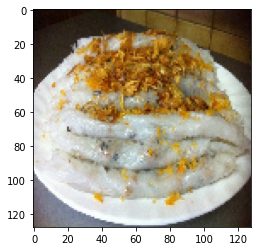

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Mon an/Test/Banh cuon/banh cuon (13).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 66ms/step
[[8.9285122e-09 4.1563506e-13 9.6214885e-01 2.1389140e-02 0.0000000e+00
  5.8143731e-05 1.0545739e-03 1.5339431e-02 2.9597174e-08 9.9516219e-06]]
Kết quả:  banh pia
Độ chính xác:  0.96214885


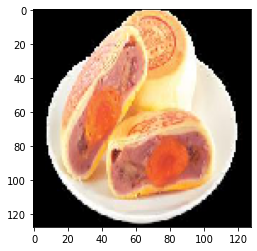

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Mon an/Test/Banh pia/pia (2).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

In [ ]:
!jupyter nbconvert --to html "/content/Nhan_dien_mon_an.ipynb"

[NbConvertApp] Converting notebook /content/Nhan_dien_mon_an.ipynb to html
[NbConvertApp] Writing 532987 bytes to /content/Nhan_dien_mon_an.html
